In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

mouse_df = pd.read_csv('data/mouse_drug_data.csv')
trial_df = pd.read_csv('data/clinicaltrial_data.csv')

combined_df = trial_df.merge(mouse_df, on='Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_vol_df = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
avg_tumor_vol_df = avg_tumor_vol_df.reset_index()

# Preview DataFrame
avg_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol_df = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_vol_df = sem_tumor_vol_df.reset_index()

# Preview DataFrame
sem_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol_pivot_df = avg_tumor_vol_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
sem_tumor_vol_pivot_df = sem_tumor_vol_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
avg_tumor_vol_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


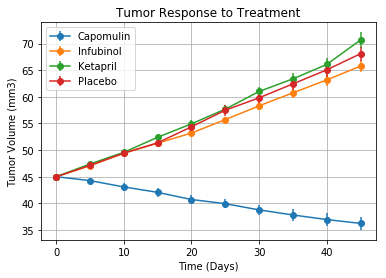

In [5]:
drugs_to_plot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# Generate the Plot (with Error Bars)
for drug in drugs_to_plot:
    plt.errorbar(
        avg_tumor_vol_pivot_df.index, 
        avg_tumor_vol_pivot_df[drug], 
        yerr=sem_tumor_vol_pivot_df[drug],
        marker='o',
    )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("figs/tumor_response.png")

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_met_site_df = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
avg_met_site_df = avg_met_site_df.reset_index()

# Preview DataFrame
avg_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_df = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_site_df = sem_met_site_df.reset_index()

# Preview DataFrame
sem_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
avg_met_site_pivot_df = avg_met_site_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
sem_met_site_pivot_df = sem_met_site_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
avg_met_site_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


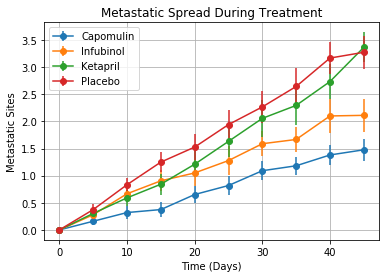

In [9]:
# Generate the Plot (with Error Bars)
for drug in drugs_to_plot:
    plt.errorbar(
        avg_met_site_pivot_df.index, 
        avg_met_site_pivot_df[drug], 
        yerr=sem_met_site_pivot_df[drug],
        marker='o',
    )

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("figs/metastatic_response.png")

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count_df = pd.DataFrame({
    'Mouse Count': combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].count()
}).reset_index()

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot_df = mice_count_df.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_count_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


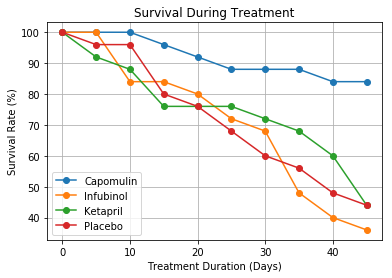

In [12]:
# Generate the Plot (Accounting for percentages)
for drug in drugs_to_plot:
    plt.plot(
        mice_count_pivot_df.index,
        100 * mice_count_pivot_df[drug] / mice_count_pivot_df[drug].iloc[0], 
        marker='o',
    )

plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("figs/mouse_survival.png")

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (avg_tumor_vol_pivot_df.iloc[-1] - avg_tumor_vol_pivot_df.iloc[0]) / avg_tumor_vol_pivot_df.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

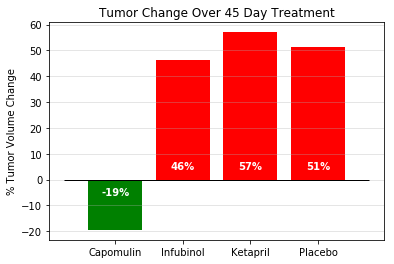

In [14]:
passing_drug_names = []
passing_drug_changes = []
failing_drug_names = []
failing_drug_changes = []

for drug, pct_change in tumor_pct_change.items():
    if drug not in drugs_to_plot:
        continue
    if pct_change < 0:
        passing_drug_names.append(drug)
        passing_drug_changes.append(pct_change)
    else:
        failing_drug_names.append(drug)
        failing_drug_changes.append(pct_change)

# Plot the data
plt.grid(axis='y', alpha=.4)
plt.bar(passing_drug_names, passing_drug_changes, color='green')
plt.bar(failing_drug_names, failing_drug_changes, color='red')

# Add line at 0
plt.hlines(0, -.75, len(passing_drug_names + failing_drug_names) - .25, linewidth=1)

# Add labels
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
for i, val in enumerate(passing_drug_changes + failing_drug_changes):
    offset = -6 if val < 0 else 4
    plt.text(i, offset, '{:.0f}%'.format(val), ha='center', color='white', weight='semibold')

# Save the Figure
plt.savefig('figs/tumor_vol_change.png')